<a href="https://colab.research.google.com/github/Shirley31415926/API_heatwave/blob/main/Heatwave_Posts_Scrapper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ignore these if you don't wanna permanently store the data that we will collect later on
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# package for scrapping blusesky posts (bluesky is under atproto, an open-source framework for building social apps)
!pip install --upgrade atproto
!pip install pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.4/380.4 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.4/682.4 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 15.0.1
    Uninstalling websockets-15.0.1:
      Successfully uninstalled websockets-15.0.1


In [1]:
from atproto import Client
client = Client()

# plz replace these with your bluesky account and password if you wanna run the following code
client.login('user_name.bsky.social','your_password')


ModuleNotFoundError: No module named 'atproto'

### Bluesky Posts Scraper

❗❗❗Heatwave posts scraper ❗❗❗

In [ ]:
import json
import time

keyword = ["heatwave"]

# Storage configuration
output_file = '/content/drive/MyDrive/heat_posts2023.jsonl'  # Colab path

### This line for scrapping 2024 posts
# output_file = '/content/drive/MyDrive/heat_posts2024.jsonl'  # Colab path


MAX_PER_DAY = 10000  # Maximum number of posts
request_delay = 1  # Request interval
error_delay = 10  # Retry interval after failure

# **Fixed time range**
since_time = "2023-06-01T00:00:00Z"
until_time = "2023-09-30T23:59:59Z"

### These 2 lines for scrapping 2024 posts
# since_time = "2024-06-01T00:00:00Z"
# until_time = "2024-09-30T23:59:59Z"




def search_and_save(f, base_params, max_results):
    """Improved version: Handles cursor issues and avoids duplicates"""
    total_saved = 0
    cursor = None
    seen_uris = set()  # Track already fetched posts

    while total_saved < max_results:
        params = base_params.copy()
        if cursor:
            params['cursor'] = cursor

        try:
            response = client.app.bsky.feed.search_posts(params)
            if not response.posts:
                print(f"No more results [{params['q']}]")
                break

            new_posts = 0
            for post in response.posts:
                if post.uri in seen_uris:
                    continue  # Skip duplicates

                seen_uris.add(post.uri)
                post_data = {
                    "uri": post.uri,
                    "text": post.record.text,
                    "created_at": post.record.created_at,
                    "author": post.author.did,
                    "search_query": base_params['q']
                }
                f.write(json.dumps(post_data) + '\n')
                total_saved += 1
                new_posts += 1
                print(f"[{post.record.created_at}] {post.record.text[:50]}...")

            if new_posts == 0:
                print("No new data retrieved, terminating pagination")
                break

            cursor = response.cursor
            if not cursor:
                break  # No more pages

            time.sleep(request_delay)

        except Exception as e:
            print(f"Search error: {str(e)}")
            time.sleep(error_delay)

    return total_saved

# Main program
total_saved = 0
with open(output_file, 'w', encoding='utf-8') as f:
    print(f"Searching for posts from 2023-06-01 to 2023-09-30...\n")

    for limitation in keyword:
        print(f"\nSearching for keyword: {limitation}")

        base_params = {
            'q': f"{limitation}",
            'since': since_time,
            'until': until_time,
            'limit': 100,
            'lang': 'en',
            'sort': 'latest'
        }

        count = search_and_save(f, base_params, MAX_PER_DAY)
        total_saved += count

        print(f"Keyword {limitation} fetched posts: {count}/{MAX_PER_DAY}")

print(f"\nData collection complete, total fetched {total_saved} posts, saved to: {output_file}")


Searching for posts from 2023-06-01 to 2023-09-30...


Searching for keyword: heatwave
[2023-09-30T22:13:48.281Z] Love that Legacy is FINALLY giving us a new Chase ...
[2023-09-30T19:14:46.674Z] every fucking time i move it’s this florida ass we...
[2023-09-30T14:56:43.043Z] I am completely flattened by hot weather. Managed ...
[2023-09-30T10:26:51.629Z] We're having a mini heatwave in Porto. Already war...
[2023-09-30T07:52:51.724Z] late night heatwave...
[2023-09-29T21:28:56.508Z] A heatwave is passing through Iowa and it’s almost...
[2023-09-29T21:01:28.620Z] Hey look. I wrote this October’s story of the mont...
[2023-09-29T17:07:55.560Z] my favorite phd study is here! 🧪Resilience to heat...
[2023-09-29T16:42:09.720Z] I can't help but blame the heatwave for this~ 

ar...
[2023-09-29T08:10:30.030Z] Reposting from the Bad Place.

Occidental culture ...
[2023-09-29T06:27:46.829Z] Yup, frustrating. Yet another thing. Ugh.

I was d...
[2023-09-28T22:38:01.765Z] Supporters time! Andrew P.

❗❗❗Analysis of posts in 2023❗❗❗

Loading data...
Generating visualization chart...


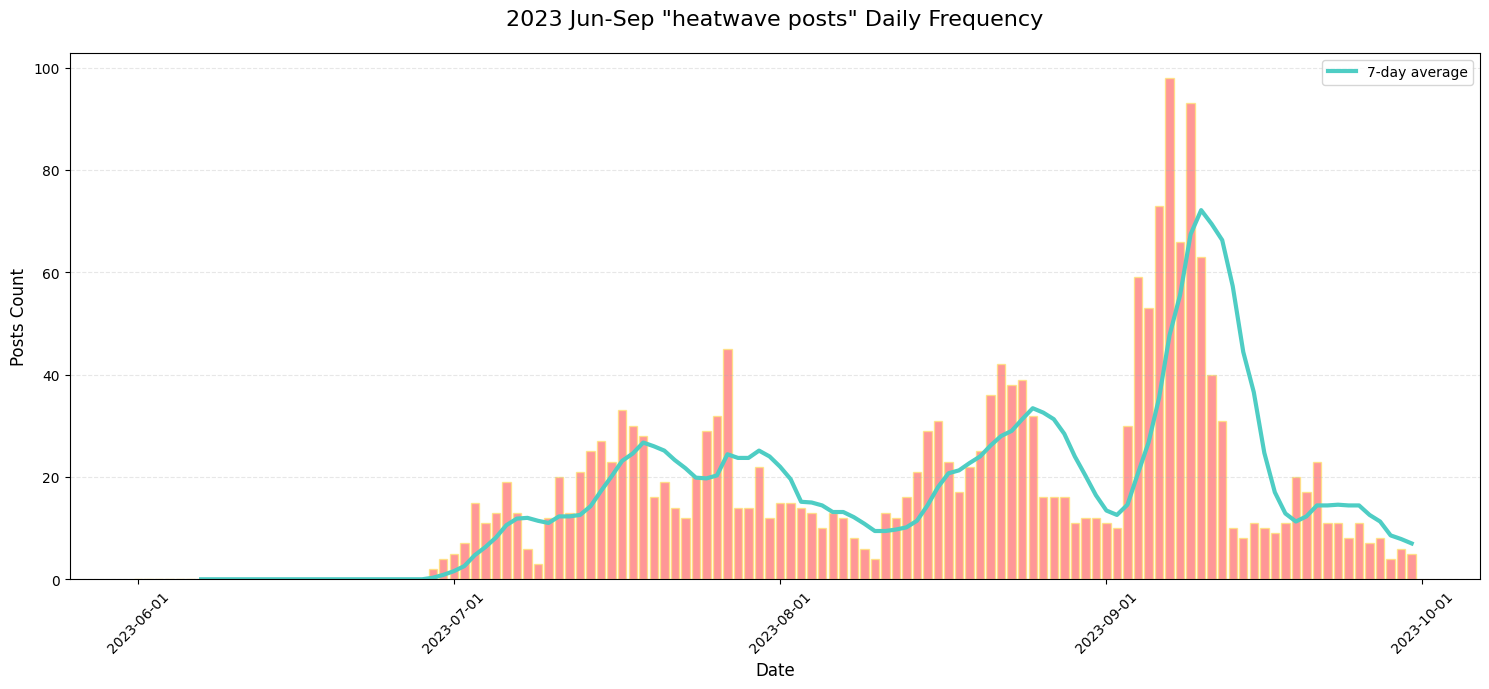


Key Statistics
Total posts: 1985
Average posts per day: 16.3
Highest single-day count: 98 (Date: 2023-09-07)

Monthly statistics:
           count               
             sum       mean max
2023-06-30     6   0.200000   4
2023-07-31   573  18.483871  45
2023-08-31   589  19.000000  42
2023-09-30   817  27.233333  98

Exceptionally active dates (Z-score > 2):
2023-09-04: 59 posts (Z-score: 2.36)
2023-09-05: 53 posts (Z-score: 2.03)
2023-09-06: 73 posts (Z-score: 3.14)
2023-09-07: 98 posts (Z-score: 4.52)
2023-09-08: 66 posts (Z-score: 2.75)
2023-09-09: 93 posts (Z-score: 4.24)
2023-09-10: 63 posts (Z-score: 2.58)

Processing complete! Chart saved as: /content/drive/MyDrive/daily_frequency2023.png


<ipython-input-5-231663957245>:76: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_stats = df.resample('M').agg(['sum', 'mean', 'max'])


In [ ]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime
from collections import defaultdict

# 1. Data loading and preprocessing
def load_data(filepath):
    """Load JSONL file and count posts per day"""
    daily_counts = defaultdict(int)

    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                post = json.loads(line)
                dt = datetime.strptime(post['created_at'], "%Y-%m-%dT%H:%M:%S.%fZ")
                date_str = dt.strftime("%Y-%m-%d")
                daily_counts[date_str] += 1
            except (json.JSONDecodeError, KeyError) as e:
                print(f"Parsing error: {e} | Line content: {line[:50]}...")
                continue

    return daily_counts

# 2. Create DataFrame and fill in missing dates
def create_dataframe(daily_counts):
    """Convert dictionary to DataFrame and handle date range"""
    df = pd.DataFrame.from_dict(daily_counts, orient='index', columns=['count'])
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()

    # Ensure all dates are included (fill with 0 values)
    date_range = pd.date_range(start="2023-06-01", end="2023-09-30", freq='D')
    df = df.reindex(date_range, fill_value=0)

    return df

# 3. Visualization function
def plot_daily_frequency(df):
    """Plot daily frequency distribution"""
    plt.figure(figsize=(15, 7))

    # Plot bar chart
    bars = plt.bar(df.index, df['count'], width=0.8, color='#FF6B6B', alpha=0.7, edgecolor='#FFE66D')

    # 7-day moving average line
    rolling_avg = df['count'].rolling(window=7).mean()
    plt.plot(df.index, rolling_avg, color='#4ECDC4', linewidth=3, label='7-day average')

    # Set chart format
    plt.title('2023 Jun-Sep "heatwave posts" Daily Frequency', fontsize=16, pad=20)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Posts Count', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.3)

    # Set x-axis ticks
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45)

    # Add legend
    plt.legend()

    # Adjust layout
    plt.tight_layout()

    # Save chart
    plt.savefig(output_image, dpi=300, bbox_inches='tight')
    plt.show()

# 4. Output statistical information
def print_statistics(df):
    """Print key statistical information"""
    monthly_stats = df.resample('M').agg(['sum', 'mean', 'max'])

    print("\n" + "="*50)
    print("Key Statistics")
    print("="*50)
    print(f"Total posts: {df['count'].sum()}")
    print(f"Average posts per day: {df['count'].mean():.1f}")
    print(f"Highest single-day count: {df['count'].max()} (Date: {df['count'].idxmax().strftime('%Y-%m-%d')})")
    print("\nMonthly statistics:")
    print(monthly_stats)

    # Outlier detection
    std_dev = df['count'].std()
    mean_val = df['count'].mean()
    threshold = mean_val + 2 * std_dev
    outliers = df[df['count'] > threshold]

    if not outliers.empty:
        print("\nExceptionally active dates (Z-score > 2):")
        for date, row in outliers.iterrows():
            z_score = (row['count']-mean_val)/std_dev
            print(f"{date.strftime('%Y-%m-%d')}: {row['count']} posts (Z-score: {z_score:.2f})")

# Main program
if __name__ == "__main__":
    # File path settings
    # File is provided in github as well, but path should be adjusted based on our own computer path
    input_file = "/content/drive/MyDrive/heat_posts2023.jsonl"
    output_image = "/content/drive/MyDrive/daily_frequency2023.png"

    try:
        # 1. Load and process data
        print("Loading data...")
        daily_counts = load_data(input_file)

        # 2. Create DataFrame
        df = create_dataframe(daily_counts)

        # 3. Generate visualization chart
        print("Generating visualization chart...")
        plot_daily_frequency(df)

        # 4. Output statistical information
        print_statistics(df)

        print(f"\nProcessing complete! Chart saved as: {output_image}")

    except FileNotFoundError:
        print(f"Error: Input file {input_file} not found.")
    except Exception as e:
        print(f"An unknown error occurred: {str(e)}")


❗❗❗2023 Calendar Heatmap❗❗❗

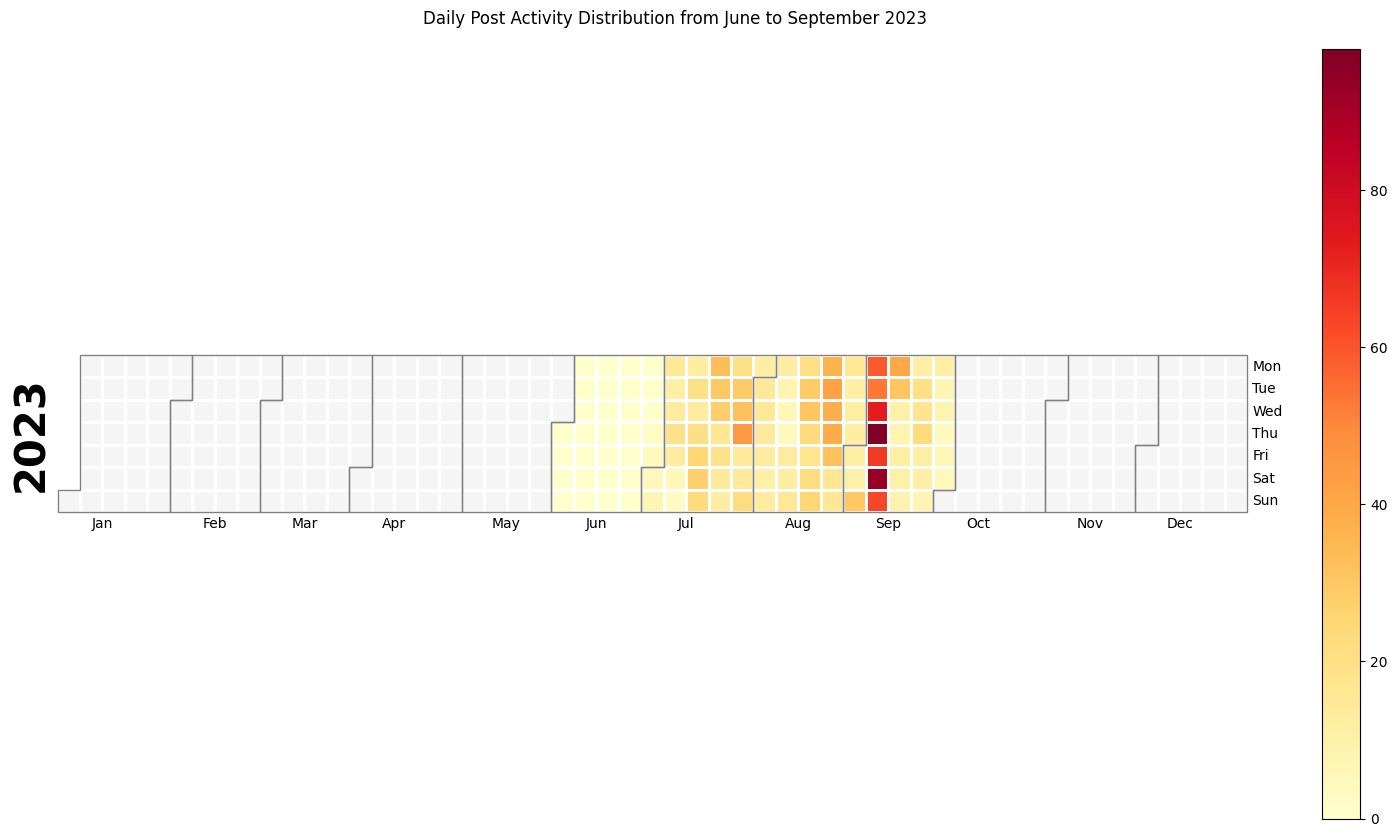

In [ ]:
# Create calendar heatmap
!pip install calplot
import calplot

# Prepare data (need to convert to Series)
calplot.calplot(df['count'],
               cmap='YlOrRd',
               figsize=(16, 8),
               yearlabel_kws={'color':'black'},
               suptitle='Daily Post Activity Distribution from June to September 2023')
output_image = "/content/drive/MyDrive/calendar_plot2023.png"
plt.savefig(output_image, dpi=300, bbox_inches='tight')
plt.show()


## ❗❗❗2024 Data Standardization (Preparation for Plotting)❗❗❗



To avoid the error like this:

`An unknown error occurred: time data '2024-09-21T10:30:33.592777+00:00' does not match format '%Y-%m-%dT%H:%M:%S.%fZ'`

In [ ]:
import json
import re
from datetime import datetime, timezone, timedelta
from collections import defaultdict

def parse_datetime(time_str):
    """
    Ultimate datetime parser that handles all common ISO-8601 formats:
    1. 2024-06-19T00:05:06.119974+00:00
    2. 2024-06-18T23:04:19.180Z
    3. 2024-06-18T23:04:19+00:00
    4. 2024-06-18T23:04:19-05:00
    5. 2024-06-18T23:04:19Z
    """
    try:
        # Preprocessing: extract base time and timezone offset
        if 'Z' in time_str:
            base_time = time_str.replace('Z', '')
            tz_offset = '+00:00'
        elif '+' in time_str:
            base_time, tz_offset = time_str.split('+')
            tz_offset = f'+{tz_offset}'
        elif '-' in time_str[10:]:  # Avoid splitting the date part
            parts = re.split(r'(?<=T\d{2}:\d{2}:\d{2})-', time_str)
            base_time = parts[0]
            tz_offset = f'-{parts[1]}'
        else:
            base_time = time_str
            tz_offset = '+00:00'

        # Ensure milliseconds are present
        if '.' not in base_time:
            base_time += '.000'
        else:
            # Pad/truncate milliseconds to 6 digits
            base_part, millis = base_time.split('.')
            millis = millis.ljust(6, '0')[:6]
            base_time = f"{base_part}.{millis}"

        # Parse base datetime
        dt = datetime.strptime(base_time, "%Y-%m-%dT%H:%M:%S.%f")

        # Apply timezone offset if needed
        if tz_offset != '+00:00':
            offset_hours = int(tz_offset[1:3])
            offset_mins = int(tz_offset[4:6])
            offset = timedelta(hours=offset_hours, minutes=offset_mins)
            if tz_offset.startswith('+'):
                dt -= offset
            else:
                dt += offset

        # Convert to UTC and format back to string
        return dt.astimezone(timezone.utc).strftime("%Y-%m-%dT%H:%M:%S.%f")[:-3] + "Z"

    except Exception as e:
        raise ValueError(f"Failed to convert time format: {time_str} | Error: {str(e)}")

def load_and_standardize(filepath):
    """Load a JSONL file and standardize the 'created_at' field"""
    standardized_data = []
    error_count = 0

    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                post = json.loads(line)
                post['created_at'] = parse_datetime(post['created_at'])
                standardized_data.append(post)
            except Exception as e:
                error_count += 1
                print(f"Skipped due to format error: {line[:60]}... | Error: {str(e)}")
                continue

    if error_count > 0:
        print(f"\nWarning: Skipped {error_count} lines due to formatting issues")
    return standardized_data

def process_jsonl(input_file, output_file):
    """Full processing pipeline"""
    print("Starting to process the JSONL file...")
    standardized_data = load_and_standardize(input_file)

    with open(output_file, 'w', encoding='utf-8') as f:
        for post in standardized_data:
            f.write(json.dumps(post, ensure_ascii=False) + '\n')

    print(f"\nDone! Standardized data saved to: {output_file}")
    print(f"Total records processed successfully: {len(standardized_data)}")

if __name__ == "__main__":
    input_file = "/content/drive/MyDrive/heat_posts2024.jsonl"
    output_file = "/content/drive/MyDrive/heat_posts2024_standardized.jsonl"

    try:
        process_jsonl(input_file, output_file)

        # Sample output for verification
        with open(output_file, 'r', encoding='utf-8') as f:
            print("\nSample output:")
            for _ in range(3):
                print(f.readline().strip())
    except Exception as e:
        print(f"Processing failed: {str(e)}")


Starting to process the JSONL file...

Done! Standardized data saved to: /content/drive/MyDrive/heat_posts2024_standardized.jsonl
Total records processed successfully: 4050

Sample output:
{"uri": "at://did:plc:slztyj6pzgpc2wea5av56a2b/app.bsky.feed.post/3l5fst77llf2f", "text": "The new Humdrum records are in and they look amazing, way better than my poorly-lit pic can convey. In stores Oct 18, direct pre-orders will start shipping in a few days when this current heatwave breaks.\nLots of places to grab a copy, incl. non-US shops:\nslumberlandrecs.lsnto.me/every-heaven", "created_at": "2024-09-30T23:02:18.386Z", "author": "did:plc:slztyj6pzgpc2wea5av56a2b", "search_query": "heatwave"}
{"uri": "at://did:plc:zcjaxfnvmy62ct2da6ys6l76/app.bsky.feed.post/3l5fkjf2wnh24", "text": "After several weeks of seasonal weather Mendocino County will experience  a heatwave. According to the National Weather Service parts of  inland Mendocino County could reach highs of 110 degrees Tuesday and  Wednesd

❗❗❗Analysis of posts in 2024❗❗❗

Loading data...
Generating visualization chart...


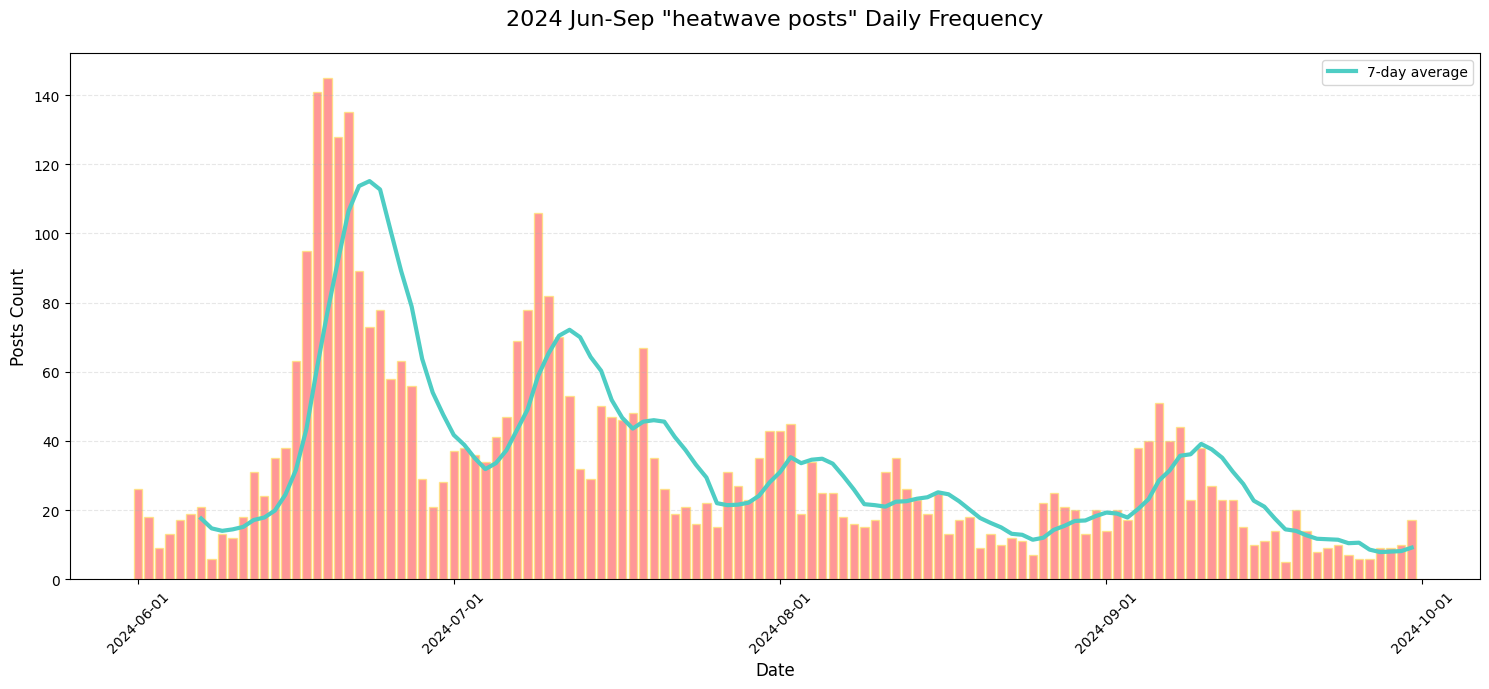


Key Statistical Indicators
Total posts: 4050
Average posts per day: 33.2
Highest single-day count: 145 (Date: 2024-06-19)

Monthly statistics:
           count                
             sum       mean  max
2024-06-30  1502  50.066667  145
2024-07-31  1323  42.677419  106
2024-08-31   647  20.870968   45
2024-09-30   578  19.266667   51

Exceptionally active dates (Z-score > 2):
2024-06-17: 95 posts (Z-score: 2.20)
2024-06-18: 141 posts (Z-score: 3.84)
2024-06-19: 145 posts (Z-score: 3.98)
2024-06-20: 128 posts (Z-score: 3.38)
2024-06-21: 135 posts (Z-score: 3.63)
2024-07-09: 106 posts (Z-score: 2.59)

Processing complete! Chart saved as: /content/drive/MyDrive/daily_frequency2024.png


<ipython-input-12-ab4a36ca69a8>:76: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_stats = df.resample('M').agg(['sum', 'mean', 'max'])


In [ ]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime
from collections import defaultdict

# 1. Data loading and preprocessing
def load_data(filepath):
    """Load JSONL file and count posts per day"""
    daily_counts = defaultdict(int)

    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                post = json.loads(line)
                dt = datetime.strptime(post['created_at'], "%Y-%m-%dT%H:%M:%S.%fZ")
                date_str = dt.strftime("%Y-%m-%d")
                daily_counts[date_str] += 1
            except (json.JSONDecodeError, KeyError) as e:
                print(f"Parsing error: {e} | Line content: {line[:50]}...")
                continue

    return daily_counts

# 2. Create DataFrame and fill in missing dates
def create_dataframe(daily_counts):
    """Convert dictionary to DataFrame and handle date range"""
    df = pd.DataFrame.from_dict(daily_counts, orient='index', columns=['count'])
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()

    # Ensure all dates are included (fill with 0 values)
    date_range = pd.date_range(start="2024-06-01", end="2024-09-30", freq='D')
    df = df.reindex(date_range, fill_value=0)

    return df

# 3. Visualization function
def plot_daily_frequency(df):
    """Plot daily frequency distribution"""
    plt.figure(figsize=(15, 7))

    # Plot bar chart
    bars = plt.bar(df.index, df['count'], width=0.8, color='#FF6B6B', alpha=0.7, edgecolor='#FFE66D')

    # 7-day moving average line
    rolling_avg = df['count'].rolling(window=7).mean()
    plt.plot(df.index, rolling_avg, color='#4ECDC4', linewidth=3, label='7-day average')

    # Set chart format
    plt.title('2024 Jun-Sep "heatwave posts" Daily Frequency', fontsize=16, pad=20)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Posts Count', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.3)

    # Set x-axis ticks
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45)

    # Add legend
    plt.legend()

    # Adjust layout
    plt.tight_layout()

    # Save chart
    plt.savefig('daily_frequency.png', dpi=300, bbox_inches='tight')
    plt.show()

# 4. Output statistical information
def print_statistics(df):
    """Print key statistical information"""
    monthly_stats = df.resample('M').agg(['sum', 'mean', 'max'])

    print("\n" + "="*50)
    print("Key Statistical Indicators")
    print("="*50)
    print(f"Total posts: {df['count'].sum()}")
    print(f"Average posts per day: {df['count'].mean():.1f}")
    print(f"Highest single-day count: {df['count'].max()} (Date: {df['count'].idxmax().strftime('%Y-%m-%d')})")
    print("\nMonthly statistics:")
    print(monthly_stats)

    # Outlier detection
    std_dev = df['count'].std()
    mean_val = df['count'].mean()
    threshold = mean_val + 2 * std_dev
    outliers = df[df['count'] > threshold]

    if not outliers.empty:
        print("\nExceptionally active dates (Z-score > 2):")
        for date, row in outliers.iterrows():
            z_score = (row['count'] - mean_val) / std_dev
            print(f"{date.strftime('%Y-%m-%d')}: {row['count']} posts (Z-score: {z_score:.2f})")

# Main program
if __name__ == "__main__":
    # File path settings
    # File is provided in github as well, but path should be adjusted based on our own computer path
    input_file = "/content/drive/MyDrive/heat_posts2024_standardized.jsonl"
    output_image = "/content/drive/MyDrive/daily_frequency2024.png"

    try:
        # 1. Load and process data
        print("Loading data...")
        daily_counts = load_data(input_file)

        # 2. Create DataFrame
        df = create_dataframe(daily_counts)

        # 3. Generate visualization chart
        print("Generating visualization chart...")
        plot_daily_frequency(df)

        # 4. Output statistical information
        print_statistics(df)

        print(f"\nProcessing complete! Chart saved as: {output_image}")

    except FileNotFoundError:
        print(f"Error: Input file {input_file} not found.")
    except Exception as e:
        print(f"An unknown error occurred: {str(e)}")


❗❗❗2024 Calendar Heatmap❗❗❗

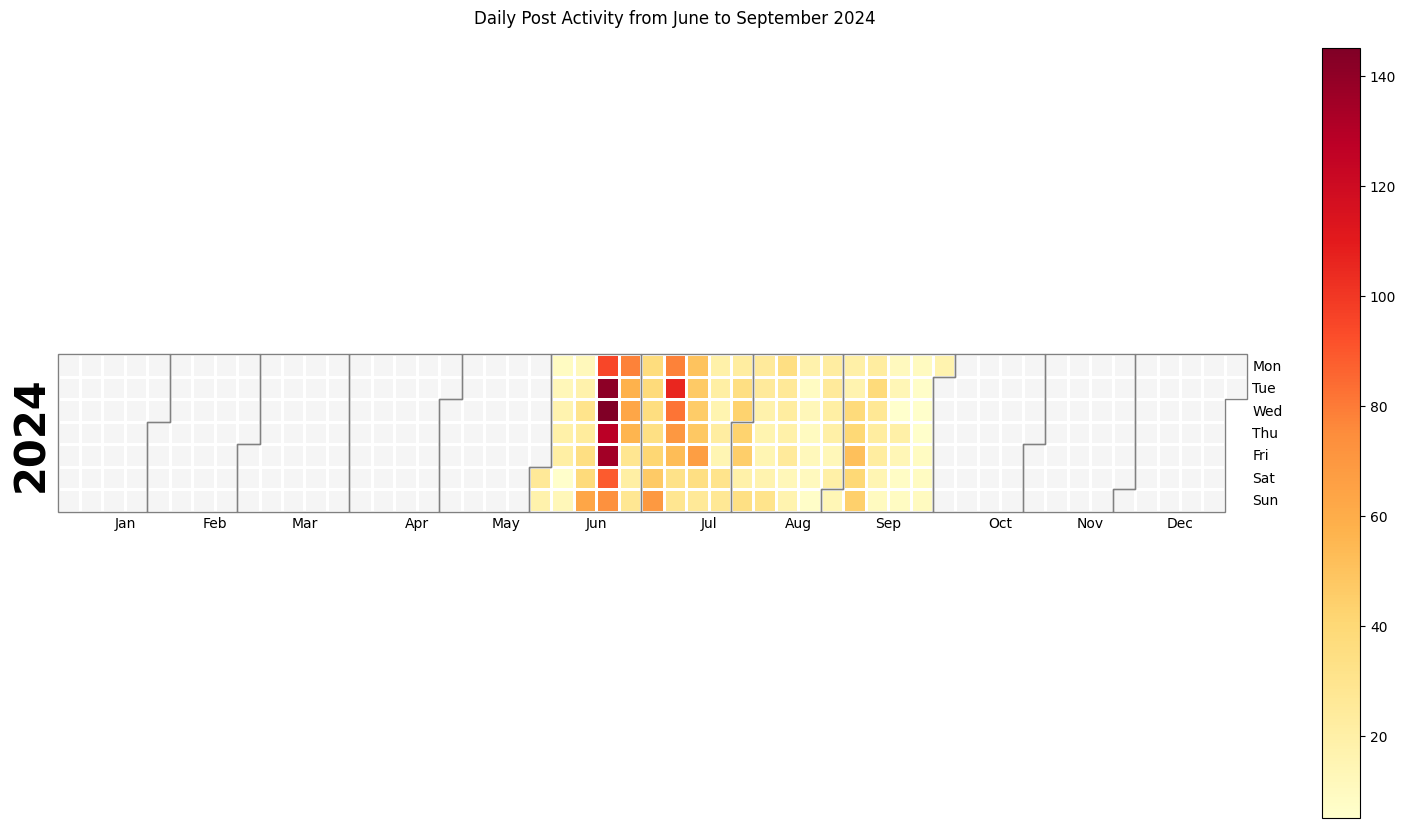

In [ ]:
# Create a calendar heatmap
!pip install calplot
import calplot

# Prepare the data (convert to a Pandas Series if needed)
calplot.calplot(df['count'],
                cmap='YlOrRd',
                figsize=(16, 8),
                yearlabel_kws={'color': 'black'},
                suptitle='Daily Post Activity from June to September 2024')

# Save the output image
output_image = "/content/drive/MyDrive/calendar_plot2024.png"
plt.savefig(output_image, dpi=300, bbox_inches='tight')
plt.show()